In [91]:
import numpy as np
np.random.seed(42)

In [92]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [93]:
dataset = load_boston()

#### Einfache Lineare Regression

## Bedeutung

<font size="4">

- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt

</font>

## Symbole

<font size="4">

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

</font>

## Datensatz

<font size="4">

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

## Formeln

<font size="4">

- $\beta = (X^TX)^{-1}X^Ty$
- coef = $\beta$\[1:\]
- intercept = $\beta$\[0\]
- $\hat{y} = X\beta$
- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

</font>

In [94]:
class LinearRegression:
    def __init__(self, use_intercept: bool = True) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0]))
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = x * self.coef_ + self.intercept_
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray):
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred)**2)
        denominator = np.sum((y - y_mean)**2)
        r2_score = 1.0 - (numerator / denominator)
        return r2_score

In [95]:
x = dataset.data[:, 5]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [96]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2: {r2_own}")
print(f"R2: {r2_sklearn}")

Coef: [9.1181022]
Intercept: -34.66230743840617
R2: 0.45846499343030633
R2: 0.45846499343030633


In [97]:
def plot_regressor(regr: LinearRegression, x: np.ndarray, y: np.ndarray) -> None:
    x_arange = np.arange(start=3.0, stop=10.0, step=0.05)
    y_arange = regr.predict(x_arange)
    plt.scatter(x, y)
    plt.plot(x_arange, y_arange, color="red")
    plt.show()

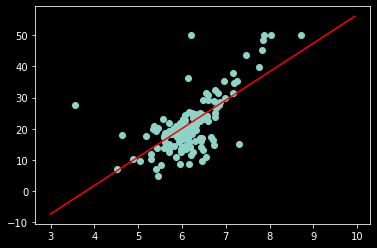

In [98]:
plot_regressor(regr, x_test, y_test)

In [99]:
def plot_residual(regr: LinearRegression, x: np.ndarray, y: np.ndarray, title: str):
    y_pred = regr.predict(x)

    min_val = np.min(y) - 0.1
    max_val = np.max(y) + 0.1

    plt.hlines(0, min_val, max_val, color="red")
    plt.scatter(y, y_pred - y, color="blue", s=8)
    plt.title(title)
    plt.show()

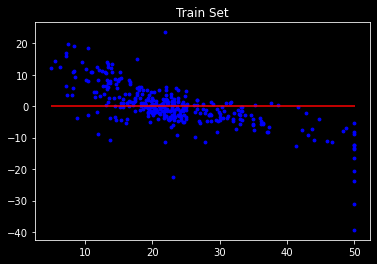

In [100]:
plot_residual(regr, x_train, y_train, title="Train Set")

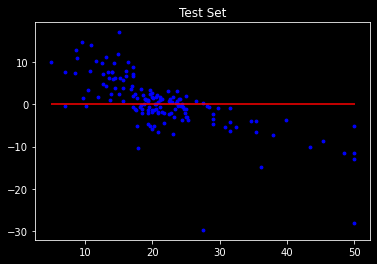

In [101]:
plot_residual(regr, x_test, y_test, title="Test Set")